In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Understanding about data

In [2]:
df = pd.read_csv('/Users/tranquangtrong/Desktop/credit_card_fraud_detection_project/data_fraud/creditcard.csv')
# Lấy một nửa dữ liệu
df_train = df.iloc[:len(df) // 2] # ngay 1
df_test = df.iloc[len(df) // 2:] # ngay 2
# Hiển thị 5 dòng đầu tiên của nửa dữ liệu
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,...,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000,142403.000000
mean,52402.922424,-0.249369,0.020786,0.673759,0.137167,-0.282933,0.078243,-0.118221,0.064969,-0.089152,...,-0.039749,-0.117939,-0.033259,0.011263,0.130894,0.021567,0.000700,0.002263,90.687055,0.001889
std,21104.546393,1.814061,1.610309,1.266018,1.322356,1.305022,1.282544,1.165530,1.233597,1.090284,...,0.721186,0.634611,0.589846,0.595726,0.437316,0.492375,0.388678,0.306209,246.459558,0.043422
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38190.500000,-1.021159,-0.560007,0.171462,-0.718089,-0.903787,-0.662023,-0.604821,-0.130534,-0.713160,...,-0.225799,-0.547094,-0.171829,-0.325901,-0.135876,-0.327178,-0.060092,-0.004181,5.990000,0.000000
50%,54201.000000,-0.271756,0.106016,0.750692,0.164312,-0.315374,-0.177339,-0.064749,0.081070,-0.153461,...,-0.059512,-0.094206,-0.045135,0.068268,0.167488,-0.066460,0.012140,0.023615,23.560000,0.000000
75%,70131.000000,1.158507,0.777726,1.363765,0.991350,0.236510,0.463246,0.409101,0.375334,0.487212,...,0.113082,0.300538,0.083055,0.408259,0.420209,0.284527,0.087769,0.077020,80.100000,0.000000
max,84691.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [4]:
df_train.isnull().sum().max()

np.int64(0)

In [5]:
df_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print('no frauds', round(df_train['Class'].value_counts()[0]/len(df_train)*100,2) , '% of the dataset')
print('fraud', round(df_train['Class'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

no frauds 99.81 % of the dataset
fraud 0.19 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

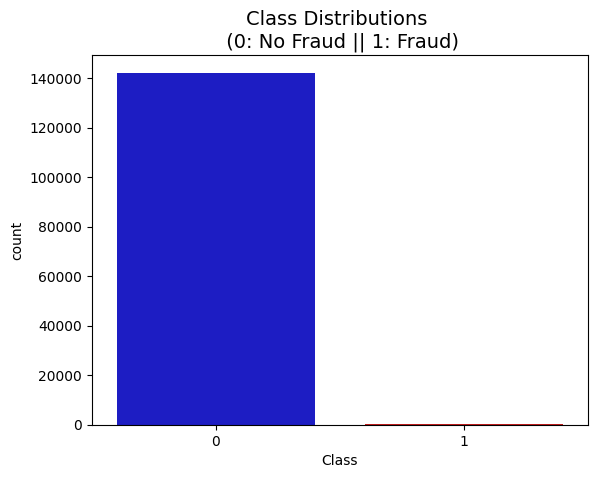

In [7]:
colors = ["#0101DF", "#DF0101"] 

sns.countplot(x='Class', data=df_train, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

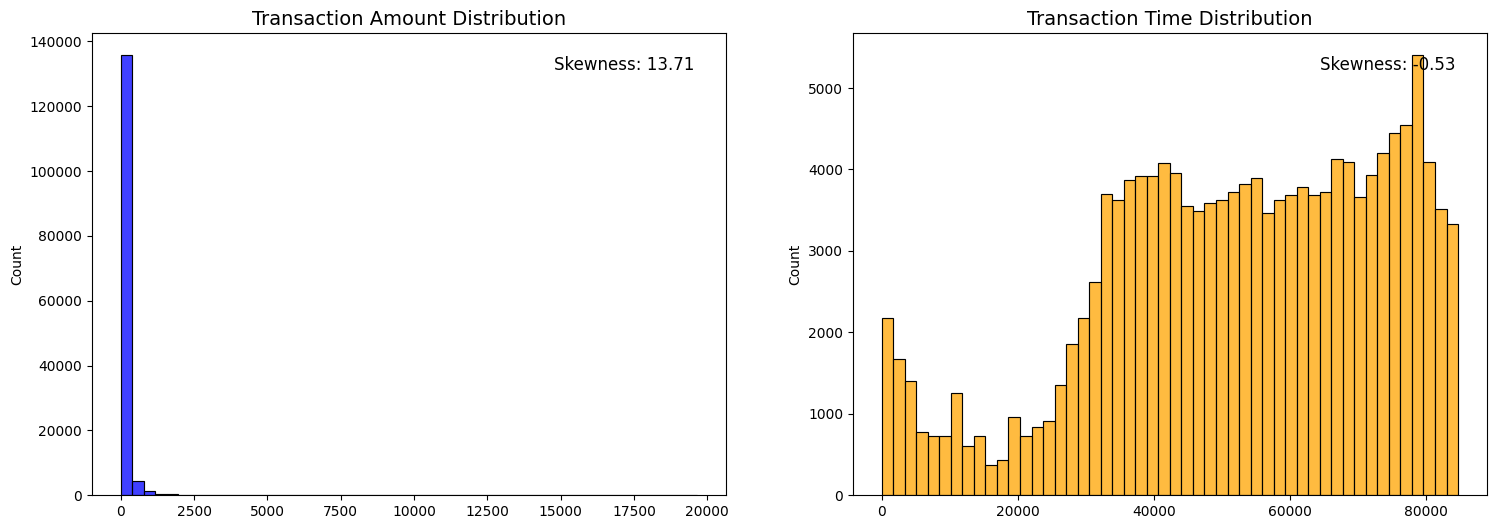

In [8]:
# by seeing the distribution we can have an idea how skewed is our dataset

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Extract values
amount_val = df_train['Amount'].values
time_val = df_train['Time'].values

# Calculate skewness
amount_skew = skew(amount_val)
time_skew = skew(time_val)

# Plot histograms
sns.histplot(amount_val, bins=50, ax=ax[0], color='blue')
ax[0].set_title('Transaction Amount Distribution', fontsize=14)
ax[0].text(0.95, 0.95, f'Skewness: {amount_skew:.2f}', transform=ax[0].transAxes, 
           fontsize=12, verticalalignment='top', horizontalalignment='right')

sns.histplot(time_val, bins=50, ax=ax[1], color='orange')
ax[1].set_title('Transaction Time Distribution', fontsize=14)
ax[1].text(0.95, 0.95, f'Skewness: {time_skew:.2f}', transform=ax[1].transAxes, 
           fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.show()

# Preprocessing

Scaling and Distributing
In this phase of our kernel, we will first scale the column Amount as V1-V28 are the datas that be transformed and normalized by PCA. Amount should be scaled as the other V columns. 

In [9]:
# StandardScaler = (X − mean) / std → sensitive to outliers
# RobustScaler = (X − median) / IQR → insensitive to outliers


# Scaling the columns
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_train['scaled_amount'] = rob_scaler.fit_transform(df_train['Amount'].values.reshape(-1, 1))
#reshape(-1,1) transforms a column into a 2D matrix (n_samples, 1) that can be used by the scaler.
# Drop the original columns without overwriting df_train
df_train.drop(['Amount'], axis=1, inplace=True)

# Check the result
df_train.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.700985
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.281608
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.791526
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.348536
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.626501


We will exchange the time column to hour in order to visualize easily

In [10]:
df_train["hour_of_day"] = (df_train["Time"] / 3600) % 24
df_train["hour_of_day"]

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
142398    23.524722
142399    23.525000
142400    23.525000
142401    23.525278
142402    23.525278
Name: hour_of_day, Length: 142403, dtype: float64

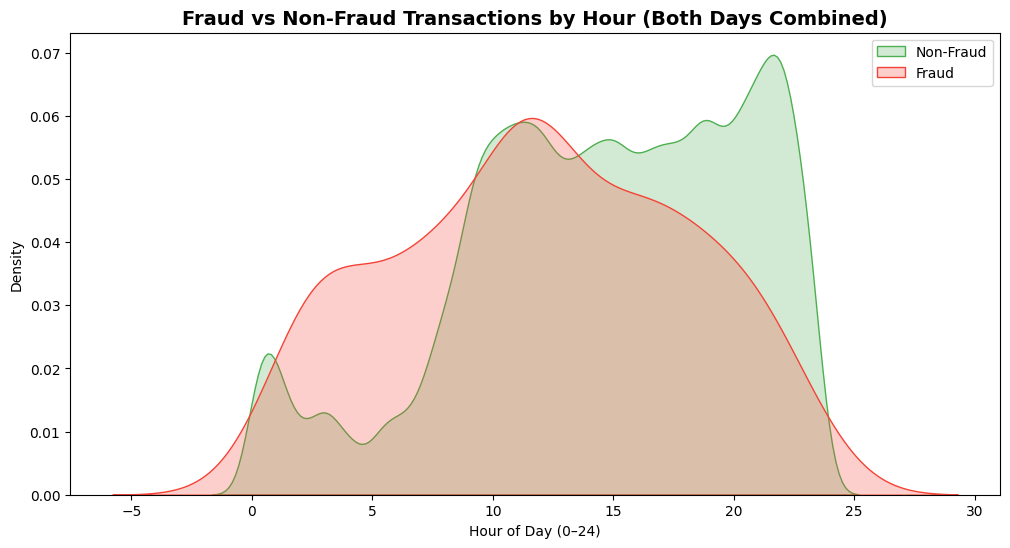

In [11]:
#Compare Fraud vs Non-Fraud by Time and Day
plt.figure(figsize=(12,6))
sns.kdeplot(df_train[df_train['Class']==0]["hour_of_day"], label='Non-Fraud', fill=True, color='#4CAF50')
sns.kdeplot(df_train[df_train['Class']==1]["hour_of_day"], label='Fraud', fill=True, color='#F44336')
plt.title('Fraud vs Non-Fraud Transactions by Hour (Both Days Combined)', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day (0–24)')
plt.ylabel('Density')
plt.legend()
plt.show()
#df_train['Hour'] is calculated from (df_train['Time'] / 3600) % 24, which represents the hour of the day (ranging from 0 to 24).
#The % 24 operation causes transactions from Day 1 and Day 2 to fall into the same hourly bins — for example, transactions that occurred at 10 AM on both days are grouped together as Hour = 10.
#Therefore, the KDE plot shows the overall (average) hourly distribution across both days, rather than separating Day 1 and Day 2 individually.
#Take the nearby data points, apply a Gaussian kernel (bell-shaped curve) — the “tails” of the curve extend slightly to the left and right. Therefore, the KDE shows density values below 0 or above 24 only to make the curve smoother — it doesn’t mean there are actual transactions at “hour 30 or -5”

Between 1 AM and 5 AM, there is a clear increase in fraudulent transactions (red area), while non-fraudulent transactions (green area) noticeably decrease. This inverse pattern indicates that fraudsters may take advantage of off-peak hours, when normal user activity is minimal and system monitoring or manual reviews are less active.

From 8 AM to 8 PM, the level of fraudulent transactions remains relatively high, following a similar trend to non-fraudulent transactions.This indicates that fraudulent activities are not limited to off-peak hours — fraudsters also operate during normal business hours, possibly blending in with regular user behavior to avoid detection.

=> We can create new feature ['hour_sensitive']

In [12]:
# Define sensitive hours
def classify_hour(hour):
    if 5 <= hour <= 20:
        return 1  # Sensitive
    else:
        return 0  # Non-sensitive

# Create the 'hour_sensitive' feature
df_train['hour_sensitive'] = df_train['hour_of_day'].apply(classify_hour)

# Verify the new feature
print(df_train[['hour_of_day', 'hour_sensitive']].head())

   hour_of_day  hour_sensitive
0     0.000000               0
1     0.000000               0
2     0.000278               0
3     0.000278               0
4     0.000556               0


In [13]:
df_train.groupby('hour_sensitive')['Class'].mean()

hour_sensitive
0    0.001753
1    0.001946
Name: Class, dtype: float64

Why We Use hour_sin and hour_cos Instead of Raw Hour Values

The original Time feature represents elapsed seconds since the first recorded transaction.
To extract meaningful temporal patterns (e.g., fraud tends to occur more frequently at night), we convert this into hour-of-day. However, hour-of-day is a cyclic variable:

After 23:00 comes 00:00

23h and 0h are very close in reality

But in numeric form: 23 and 0 appear far apart

This discontinuity causes issues for correlation, distance-based models, and neural network optimization.


Problem with Using Raw Hour Values (0–23)

Using a single column like:

0, 1, 2, ..., 23


introduces false distances:

Distance between 23 and 0 = 23 (but in reality, they are only 1 hour apart)


Distance between 10 and 11 = 1 (correct)


Distance between 22 and 2 = 20 (but they are only 4 hours apart on the clock)


Therefore:


Pearson correlation becomes unreliable


Linear/logistic regression misinterprets relationships


Distance-based models (KNN, SVM) behave incorrectly


Tree models require unnecessary splits


Neural networks need more capacity to approximate the cyclic pattern


Conclusion: raw hour encoding does not reflect the true structure of time.

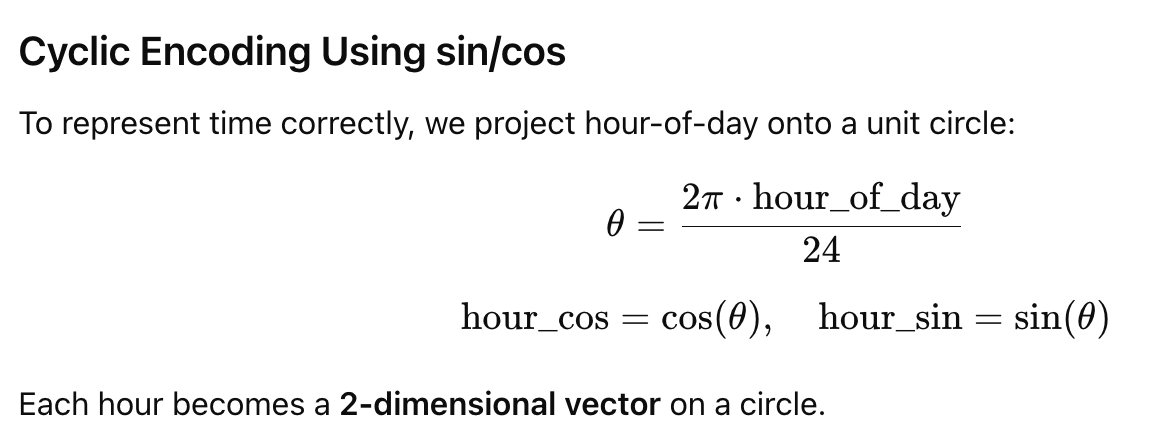

Advantages:
1. Preserves cyclic continuity

23h → (cos, sin) very close to

0h → (cos, sin)

This matches real-world behavior.

2. Distances become meaningful

10h is close to 11h

22h is close to 2h through the cycle

12h is opposite 0h (correct)

3. No loss of information

cos alone or sin alone is symmetric;
together they create a unique vector for each hour.

4. Improves model learning

All ML models benefit:

Logistic Regression learns a clean linear boundary in 2D

Trees/XGBoost need fewer splits

KNN/SVM compute correct distances

Neural networks train faster and avoid false discontinuities

5. Correlation becomes more meaningful

Raw hour produces misleading correlation.
sin/cos reflect real temporal patterns and yield more interpretable statistical relationships.

In [14]:
df_train["hour_sin"] = np.sin(2 * np.pi * df_train["hour_of_day"] / 24)
df_train["hour_cos"] = np.cos(2 * np.pi * df_train["hour_of_day"] / 24)

As you can see that this new feature would help the model learn better due to the clear difference between two groups

Maybe the large amount of money is indication of fraud transaction

amount_q
(-0.319, -0.304]    0.007067
(-0.304, -0.268]    0.000599
(-0.268, -0.197]    0.001297
(-0.197, -0.129]    0.000361
(-0.129, 0.0]       0.000703
(0.0, 0.208]        0.000626
(0.208, 0.521]      0.000639
(0.521, 1.085]      0.002597
(1.085, 2.51]       0.001686
(2.51, 264.917]     0.002879
Name: Class, dtype: float64


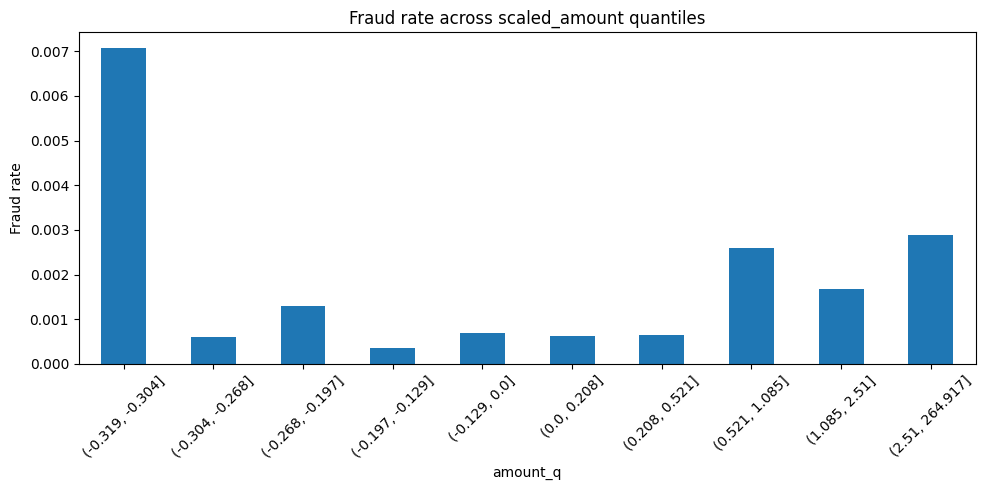

In [15]:
df_train["amount_q"] = pd.qcut(df_train["scaled_amount"], q=10)

fraud_rate_q = df_train.groupby("amount_q")["Class"].mean()
print(fraud_rate_q)

fraud_rate_q.plot(kind="bar", figsize=(10,5))
plt.ylabel("Fraud rate")
plt.title("Fraud rate across scaled_amount quantiles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation on Fraud Patterns Across Transaction Amounts

The distribution of fraud across transaction amounts exhibits a clear U-shaped pattern, where both extremely small and extremely large transactions show higher fraud rates compared to mid-range amounts.

1. Smallest-amount fraud (test transactions)
Fraudsters often initiate very small transactions (e.g., $1, $3, $5, $7) to test whether a stolen card is still active and whether the issuing bank will approve the transaction.
If this “test charge” is successful, the attacker typically proceeds to larger, high-value transactions.
This behavior explains why the lowest amount quantiles show elevated fraud rates.

2. Large-amount fraud (high-value exploitation)
When fraudsters gain temporary access to a compromised card, they typically have a limited window of time.
To maximize financial gain, they attempt:

large cash withdrawals,

high-value purchases, or

rapid, high-amount transactions intended for resale.
Consequently, the highest amount quantiles also exhibit elevated fraud rates.

3. Mid-range amounts show minimal fraud activity
Legitimate customers most commonly transact within mid-range amounts, which represent typical daily spending.
Fraudsters rarely operate in this range because:

it does not maximize financial gain, and

it resembles normal customer behavior, making detection less likely but profit too small.

As a result, mid-range amounts demonstrate the lowest fraud rate, forming the bottom of the U-shape.

In [16]:
#Then we create the feature check ing if the transaction amount is in the weird quantiles (the first 2 and the last 3 quantiles)
# Extract the left bound of the interval for comparison
df_train["weird_amount"] = df_train["amount_q"].apply(lambda x: 1 if (x.left <= 0 or x.right >= 7) else 0)

# Group by the new feature and calculate the mean of the "Class" column
df_train.groupby("weird_amount")["Class"].mean()

weird_amount
0    0.001644
1    0.001993
Name: Class, dtype: float64

In [17]:
# Calculate the overall fraud rate in the dataset
overall_fraud_rate = df_train["Class"].mean()

# Calculate the fraud rate for transactions flagged as "weird_amount"
weird_fraud_rate = df_train.groupby("weird_amount")["Class"].mean()

# Display the results
print(f"Overall Fraud Rate: {overall_fraud_rate:.10f}")
print("Fraud Rate by Weird Amount:")
print(weird_fraud_rate)

Overall Fraud Rate: 0.0018890051
Fraud Rate by Weird Amount:
weird_amount
0    0.001644
1    0.001993
Name: Class, dtype: float64


In [18]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Class,scaled_amount,hour_of_day,hour_sensitive,hour_sin,hour_cos,amount_q,weird_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.133558,-0.021053,0,1.700985,0.000000,0,0.000000,1.0,"(1.085, 2.51]",0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.008983,0.014724,0,-0.281608,0.000000,0,0.000000,1.0,"(-0.304, -0.268]",1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.055353,-0.059752,0,4.791526,0.000278,0,0.000073,1.0,"(2.51, 264.917]",1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.062723,0.061458,0,1.348536,0.000278,0,0.000073,1.0,"(1.085, 2.51]",0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.219422,0.215153,0,0.626501,0.000556,0,0.000145,1.0,"(0.521, 1.085]",0


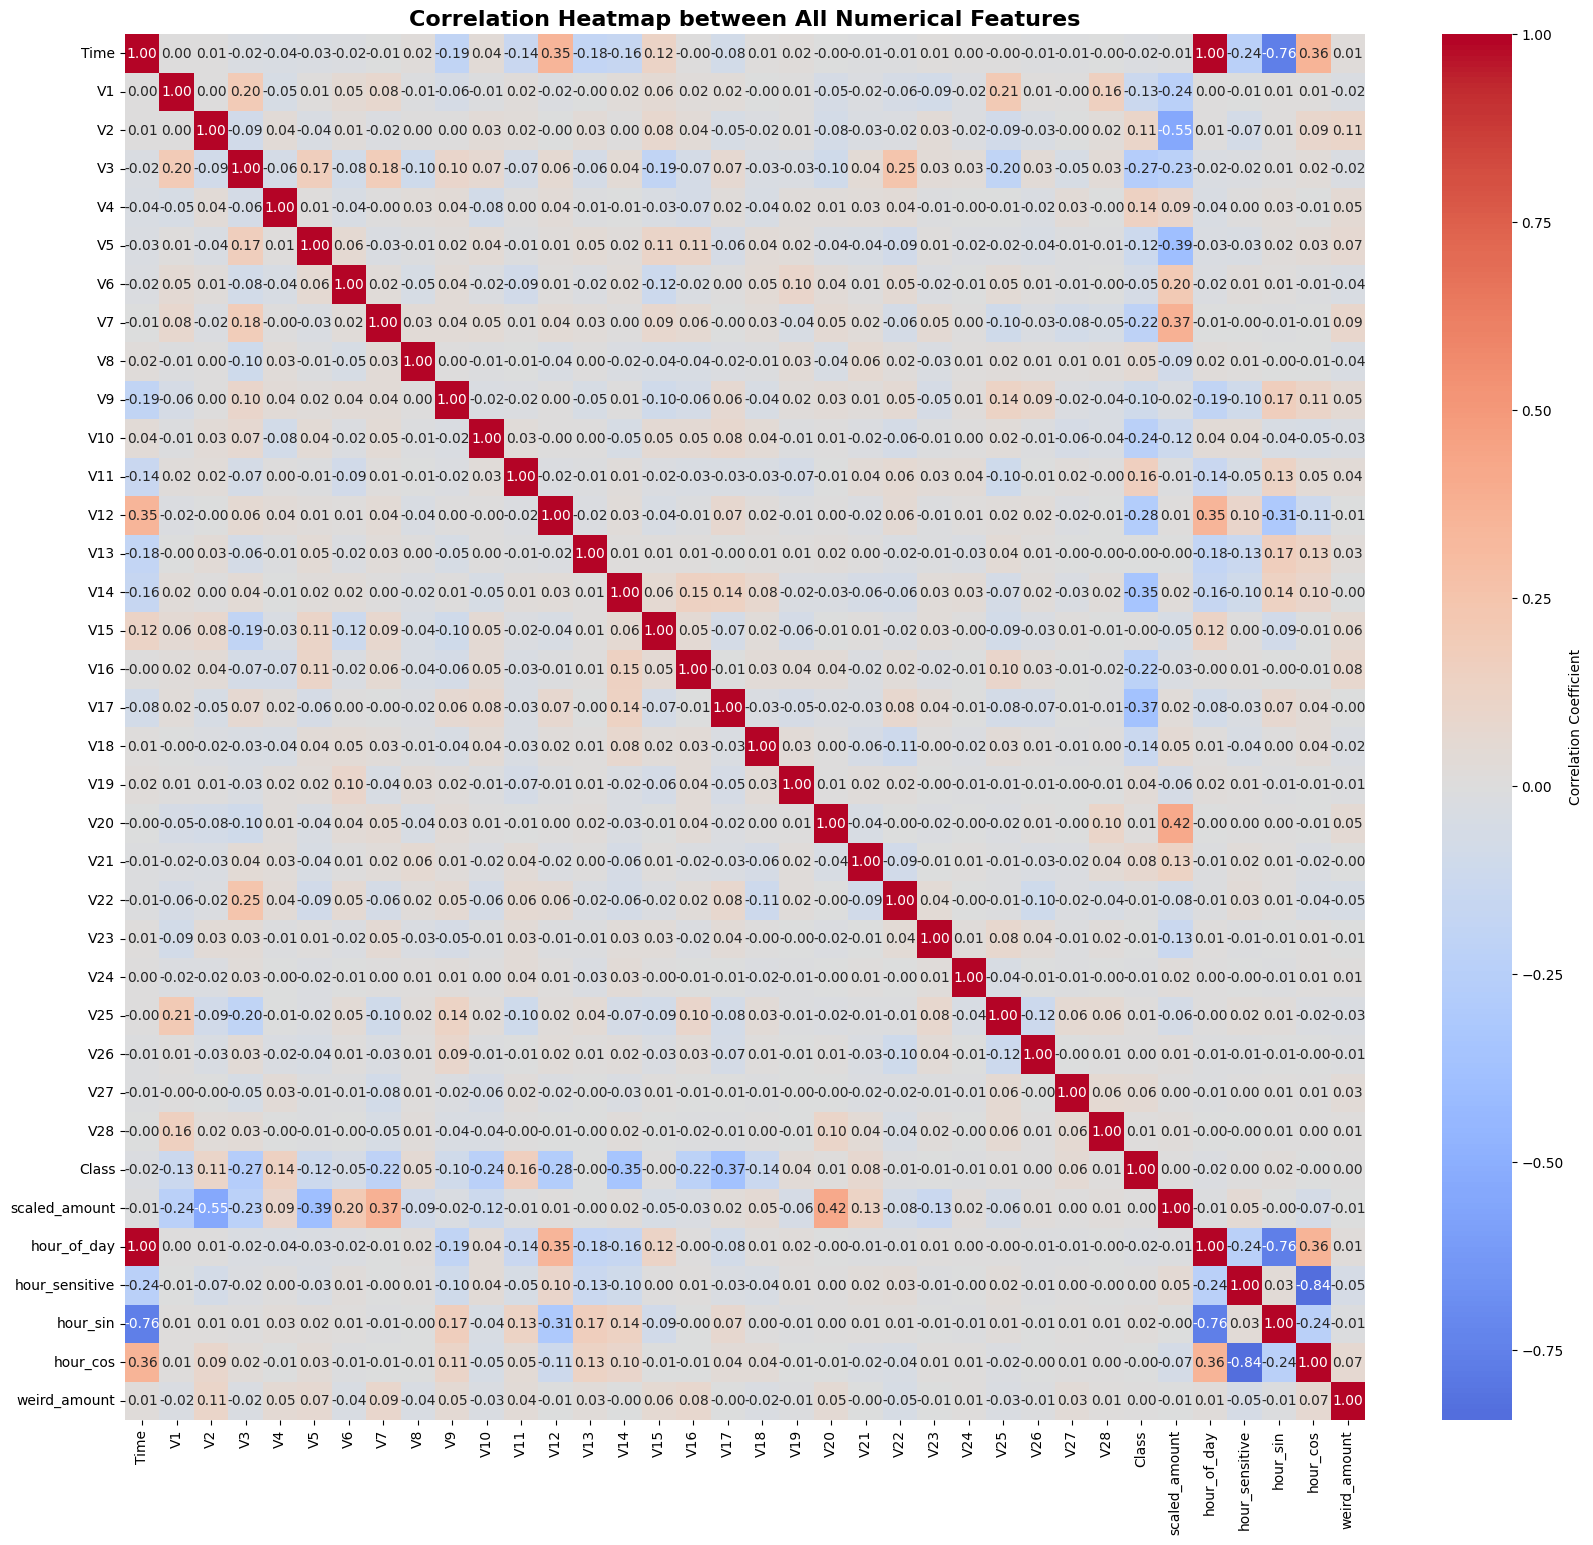

In [19]:
# Correlation between all numerical features
numeric_df = df_train.select_dtypes(include=["number"])
corr_matrix = numeric_df.corr()


# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap between All Numerical Features", fontsize=16, fontweight='bold')
plt.show()

The features that are most correlated to the classes are V17,V16,V14,V12,V10,V7,V3

Anomaly Detection:


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


Interquartile Range Method:

Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.

Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

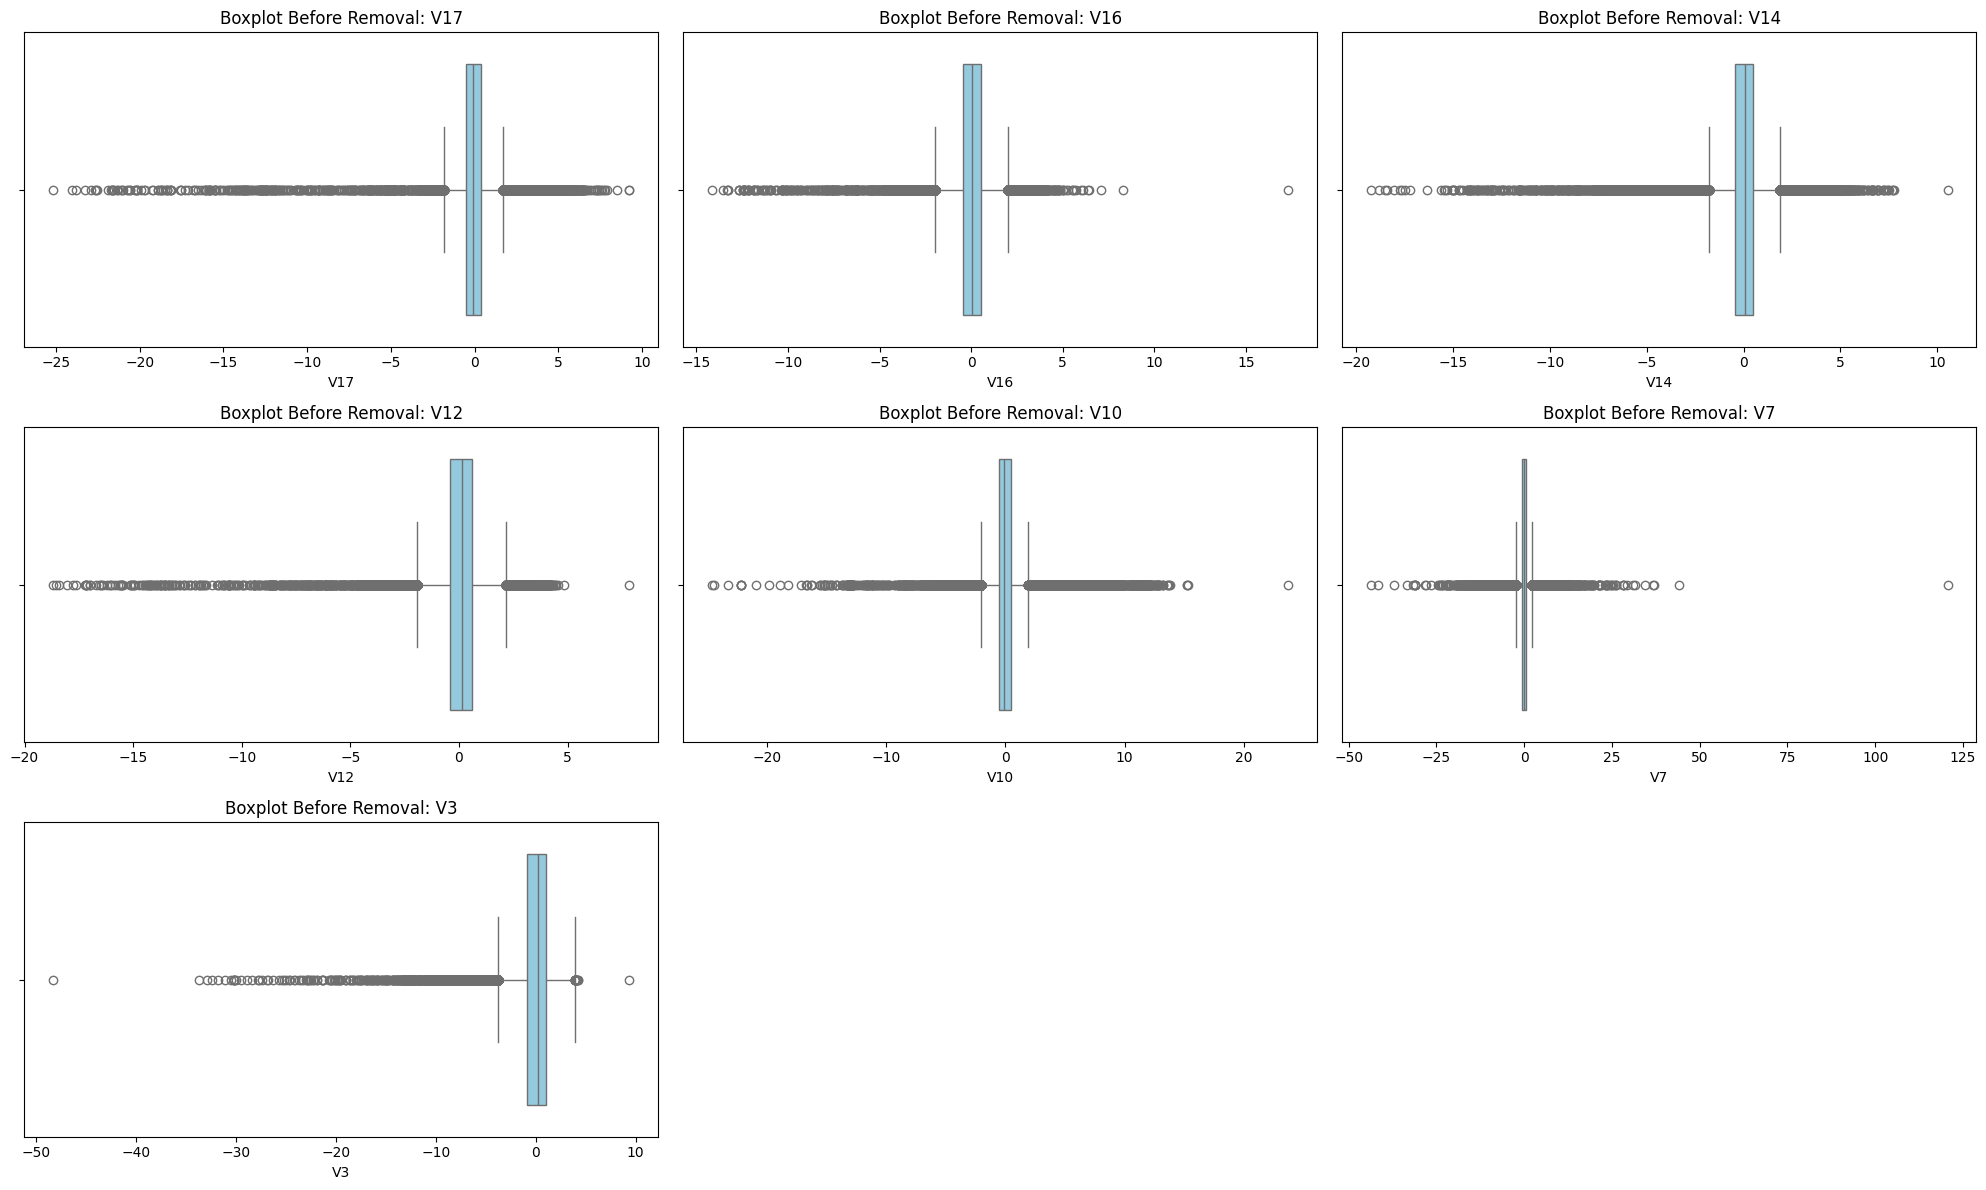

In [20]:
features = ["V17","V16","V14","V12","V10","V7","V3"]

plt.figure(figsize=(20, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot Before Removal: {col}")
plt.tight_layout()
plt.show()

In [21]:
# Features có tương quan mạnh với Class → chứa outliers → cần làm sạch
cols_to_clean = ["V17", "V16", "V14", "V12", "V10", "V7", "V3"]

def remove_extreme_outliers(df, cols, multiplier=3.0):
    df_clean = df.copy()
    
    for col in cols:
        q25 = np.percentile(df_clean[col], 25)
        q75 = np.percentile(df_clean[col], 75)
        iqr = q75 - q25

        lower = q25 - multiplier * iqr
        upper = q75 + multiplier * iqr

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    
    return df_clean

# Tạo dataframe mới đã clean
df_train_clean = remove_extreme_outliers(df_train, cols_to_clean, multiplier=3.0)

print("Before:", len(df_train))
print("After :", len(df_train_clean))
print("Removed:", len(df_train) - len(df_train_clean))

Before: 142403
After : 136524
Removed: 5879


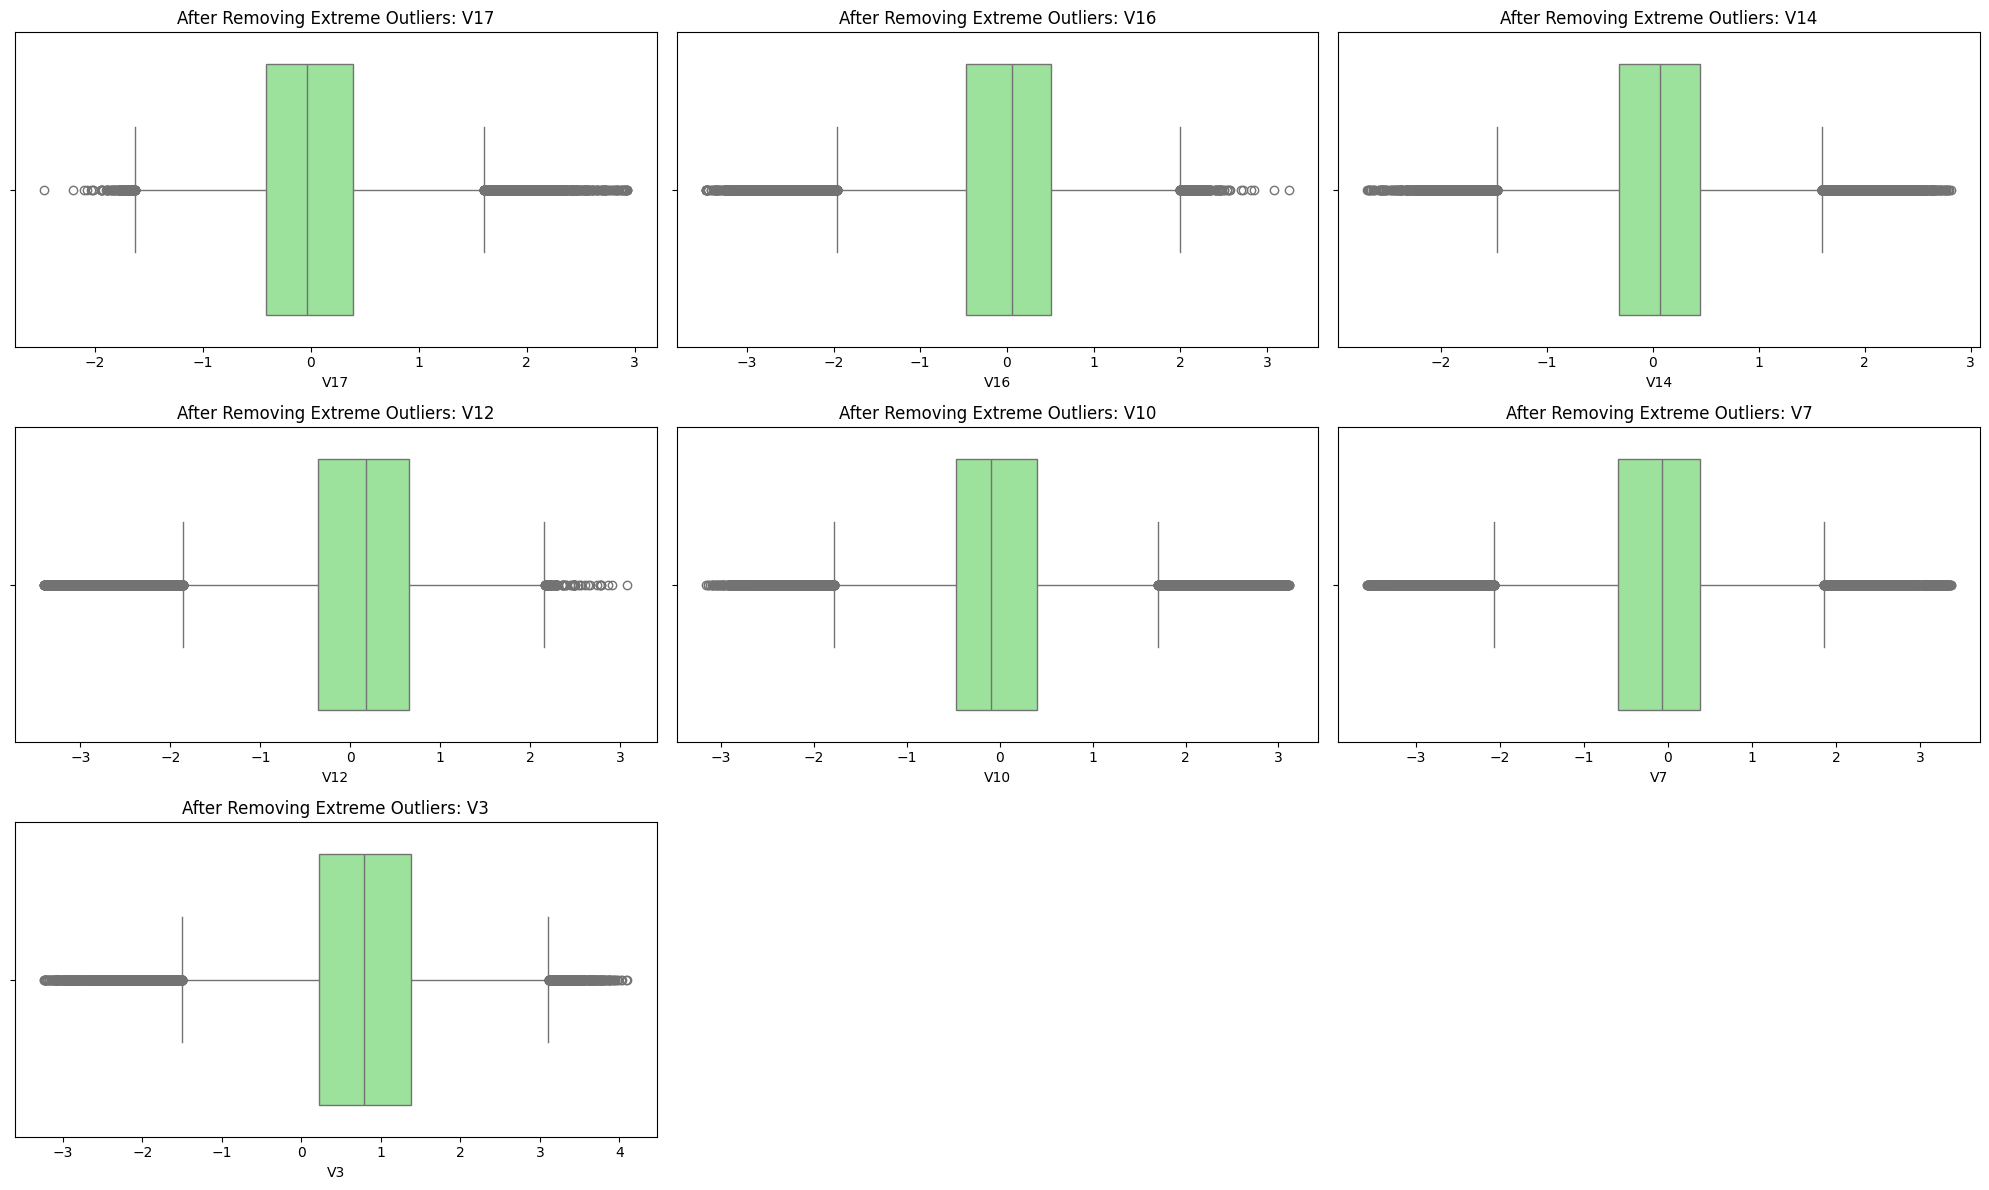

In [22]:

plt.figure(figsize=(20, 12))
for i, col in enumerate(cols_to_clean):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_train_clean[col], color="lightgreen")
    plt.title(f"After Removing Extreme Outliers: {col}")
plt.tight_layout()
plt.show()


In [23]:
for col in features:
    low_thr  = df_train_clean[col].quantile(0.01)
    high_thr = df_train_clean[col].quantile(0.99)

    df_train_clean[col+"_tail"] = (
        (df_train_clean[col] < low_thr).astype(int)*1 +    # bottom tail
        (df_train_clean[col] > high_thr).astype(int)*2      # top tail
    )

    print("\n=== Feature:", col, "===")
    print(df_train_clean.groupby(col+"_tail")["Class"].mean())



=== Feature: V17 ===
V17_tail
0    0.000224
1    0.000000
2    0.003660
Name: Class, dtype: float64

=== Feature: V16 ===
V16_tail
0    0.000262
1    0.000000
2    0.000000
Name: Class, dtype: float64

=== Feature: V14 ===
V14_tail
0    0.000209
1    0.005124
2    0.000000
Name: Class, dtype: float64

=== Feature: V12 ===
V12_tail
0    0.000254
1    0.000732
2    0.000000
Name: Class, dtype: float64

=== Feature: V10 ===
V10_tail
0    0.000254
1    0.000732
2    0.000000
Name: Class, dtype: float64

=== Feature: V7 ===
V7_tail
0    0.000247
1    0.000000
2    0.001464
Name: Class, dtype: float64

=== Feature: V3 ===
V3_tail
0    0.000262
1    0.000000
2    0.000000
Name: Class, dtype: float64


✅ 1) Phân tích & nhận xét từng feature từ output của bạn

Tôi sẽ so sánh fraud rate của tail với fraud rate bình thường (tail = 0).

Feature: V17
Tail	Fraud rate	Nhận xét
0	0.000224	baseline
1	0	không hữu ích
2	0.003660	cao gấp 16 lần baseline

→ Chỉ top tail (2) có giá trị → nên +1 risk_score ở top tail thôi.

Feature: V16
Tail	Fraud rate
0	0.000262
1	0
2	0

→ Không có tail nào có fraud cao hơn → bỏ qua trong risk_score.

Feature: V14
Tail	Fraud rate	Nhận xét
0	0.000209	baseline
1	0.005124	cao gấp 24 lần
2	0	không hữu ích

→ Chỉ bottom tail (1) có giá trị → nên +1 risk_score ở bottom tail thôi.

Feature: V12
Tail	Fraud rate
0	0.000254
1	0.000732 (cao hơn ~3× nhưng rất nhỏ)
2	0

→ Tail này yếu, không đủ mạnh, có thể không cần đưa vào risk_score.

Feature: V10
Tail	Fraud rate
0	0.000254
1	0.000732 (cao hơn nhưng yếu)
2	0

→ Cũng không đủ mạnh để dùng (chỉ 3× baseline).

Feature: V7
Tail	Fraud rate	Nhận xét
0	0.000247	
1	0	
2	0.001464	cao gấp 6 lần

→ Chỉ top tail (2) có signal → nên +1 risk_score tại top tail.

Feature: V3
Tail	Fraud rate
0	0.000262
1	0
2	0

→ Không có tín hiệu → bỏ qua.

➡ Chỉ nên dùng V17_top, V14_bottom và V7_top để tăng risk_score.

## Tạo biến `risk_score`

Mục tiêu của bước này là tạo ra một đặc trưng tổng hợp giúp mô hình ML nhận diện 
giao dịch bất thường rõ hơn so với việc chỉ dùng các PCA features gốc.

### 1. Điểm bất thường theo Amount (`weird_amount`)
Giao dịch có amount quá nhỏ hoặc quá lớn thường liên quan đến hành vi fraud 
(thử thẻ hoặc cash-out).  
→ Nếu thuộc nhóm này: `risk_score += 1`.

### 2. Điểm nhạy cảm theo thời gian (`hour_sensitive`)
Fraud thường xảy ra nhiều vào các khung giờ ít hoạt động (off-peak).  
→ Nếu giao dịch rơi vào giờ nguy cơ: `risk_score += 1`.

### 3. Outliers theo PCA (cả low-tail và high-tail)
Với các feature PCA quan trọng (V3, V7, V10, V12, V14, V16, V17):

- Tính **ngưỡng 1% thấp nhất** và **1% cao nhất**
- Nếu giá trị nằm ngoài khoảng này → được xem là bất thường  
→ `risk_score += 1` cho mỗi feature vượt ngưỡng.

Điều này giúp mô hình nhận diện cả bất thường rất nhỏ (âm sâu) và bất thường rất lớn.


---

### Lợi ích
`risk_score` tổng hợp nhiều tín hiệu bất thường (amount, thời gian, PCA tail, outlier thống kê),  
giúp mô hình ML học tốt hơn các pattern fraud vốn rất hiếm và phi tuyến tính.

In [24]:
# Reset risk_score
df_train_clean["risk_score"] = 0

# 1. Weird amount
df_train_clean["risk_score"] += df_train_clean["weird_amount"]

# 2. Hour-sensitive
df_train_clean["risk_score"] += df_train_clean["hour_sensitive"]

# 3. Tail-based risk ONLY where fraud rate is high
# V14 → bottom tail
low_thr_V14 = df_train_clean["V14"].quantile(0.01)
df_train_clean["risk_score"] += (df_train_clean["V14"] < low_thr_V14).astype(int)

# V17 → top tail
high_thr_V17 = df_train_clean["V17"].quantile(0.99)
df_train_clean["risk_score"] += (df_train_clean["V17"] > high_thr_V17).astype(int)

# V7 → top tail
high_thr_V7 = df_train_clean["V7"].quantile(0.99)
df_train_clean["risk_score"] += (df_train_clean["V7"] > high_thr_V7).astype(int)

print(df_train_clean["risk_score"].value_counts())


risk_score
2    64624
1    59098
0    10485
3     2221
4       94
5        2
Name: count, dtype: int64


In [25]:
risk_fraud_rate = df_train_clean.groupby("risk_score")["Class"].mean()
count_by_risk = df_train_clean["risk_score"].value_counts().sort_index()

print("Fraud rate theo risk_score:\n", risk_fraud_rate)
print("\nSố lượng sample theo risk_score:\n", count_by_risk)


Fraud rate theo risk_score:
 risk_score
0    0.000191
1    0.000118
2    0.000279
3    0.002701
4    0.010638
5    0.500000
Name: Class, dtype: float64

Số lượng sample theo risk_score:
 risk_score
0    10485
1    59098
2    64624
3     2221
4       94
5        2
Name: count, dtype: int64


In [26]:
df_train_clean.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'hour_of_day', 'hour_sensitive', 'hour_sin',
       'hour_cos', 'amount_q', 'weird_amount', 'V17_tail', 'V16_tail',
       'V14_tail', 'V12_tail', 'V10_tail', 'V7_tail', 'V3_tail', 'risk_score'],
      dtype='object')

In [27]:
cols_to_drop = ["V17_tail", "V16_tail", "V14_tail", "V12_tail", 
                "V10_tail", "V7_tail", "V3_tail"]

df_train_clean = df_train_clean.drop(columns=cols_to_drop)


## Skewness

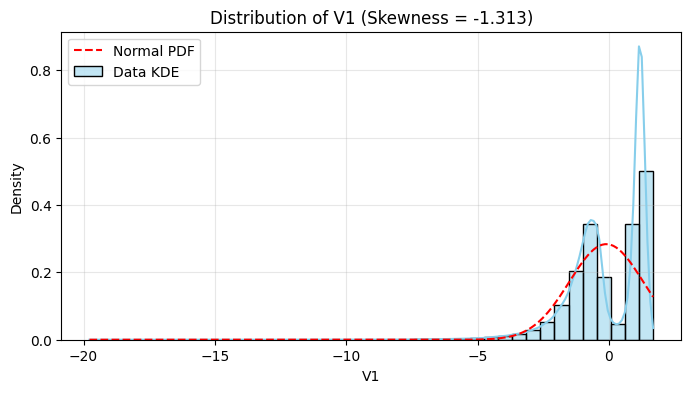

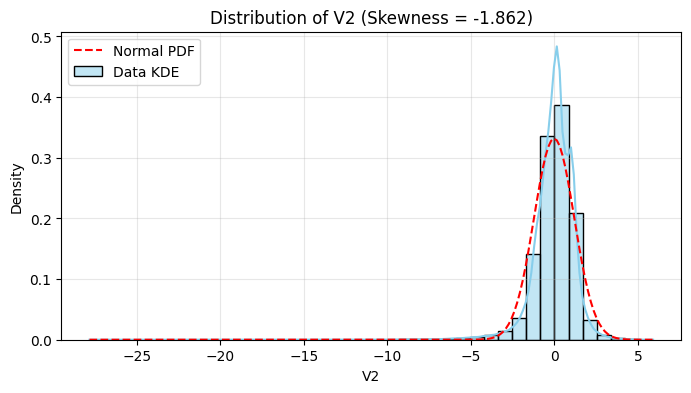

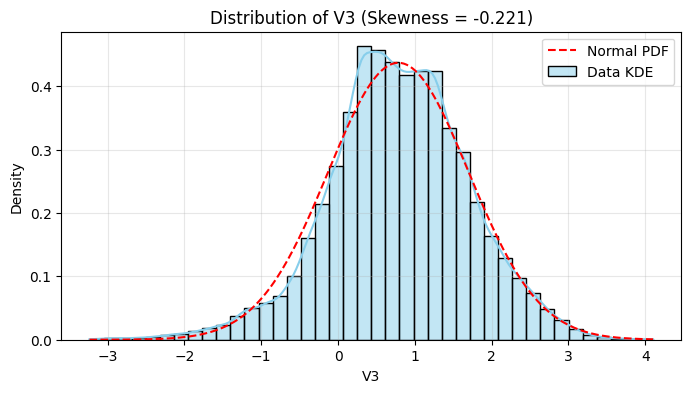

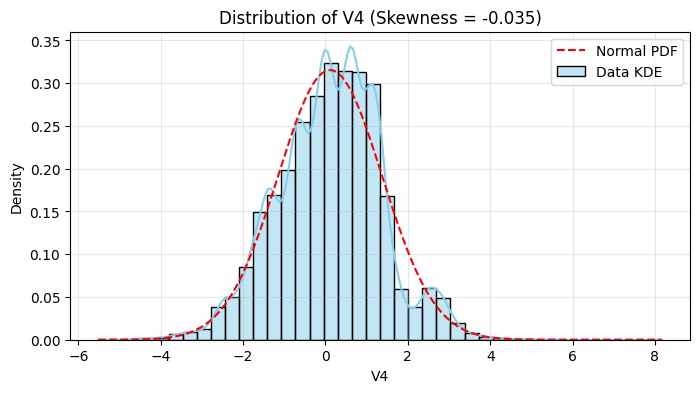

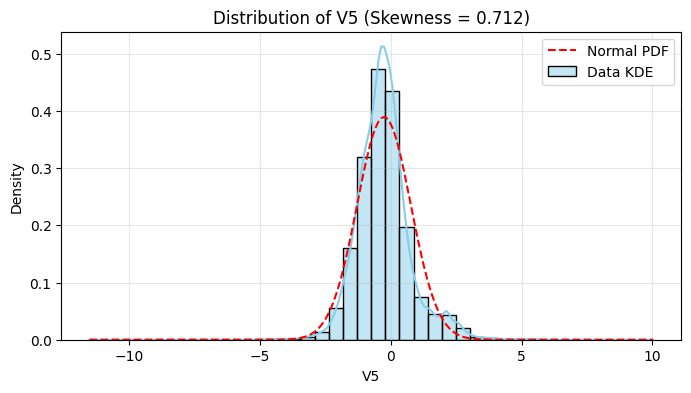

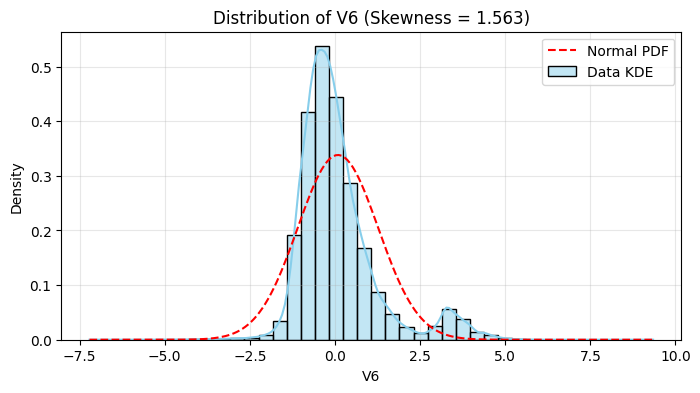

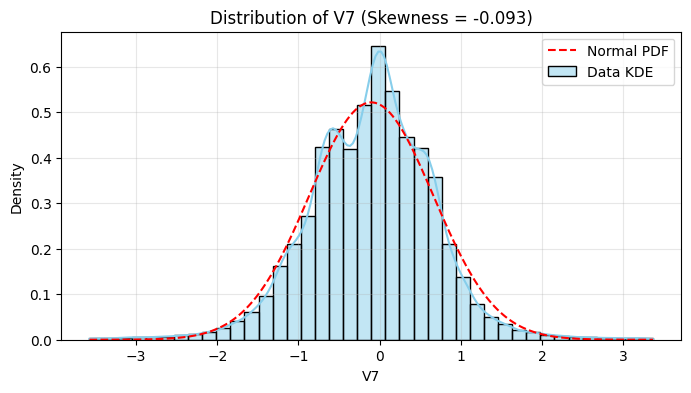

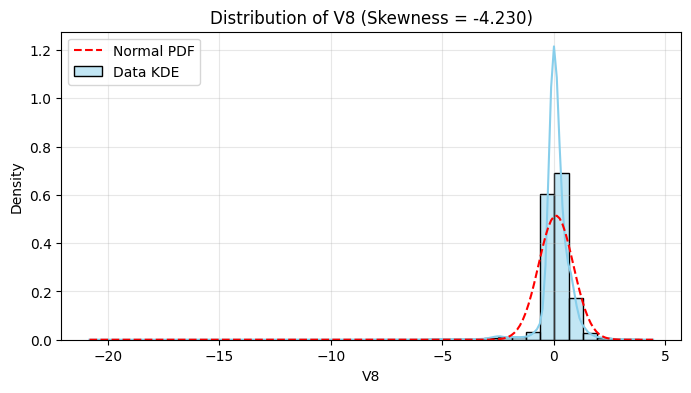

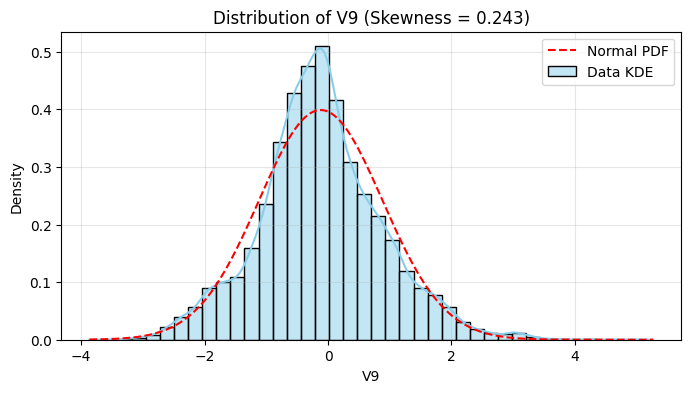

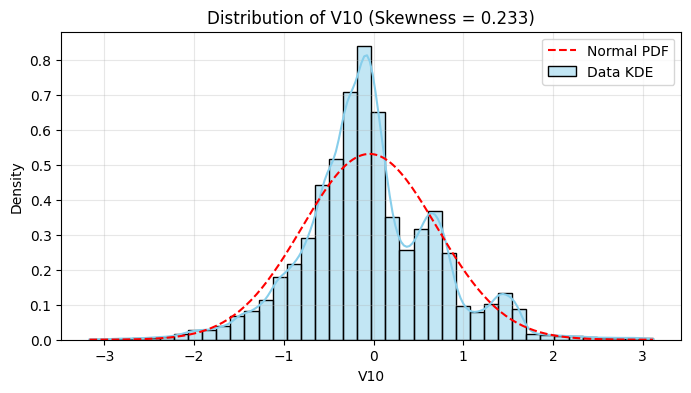

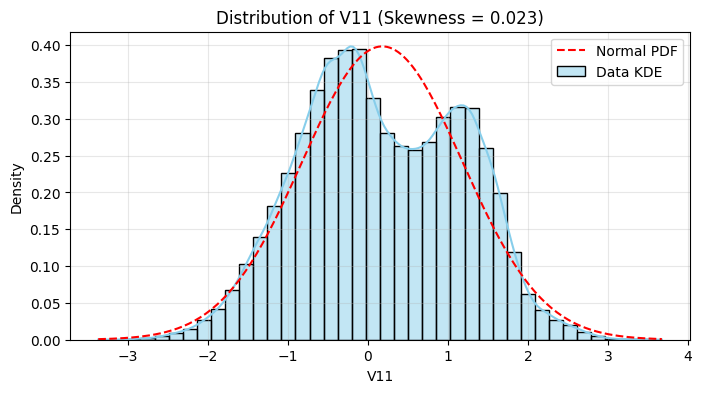

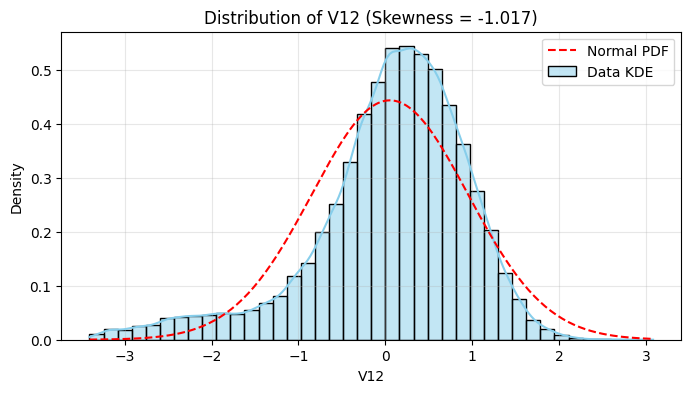

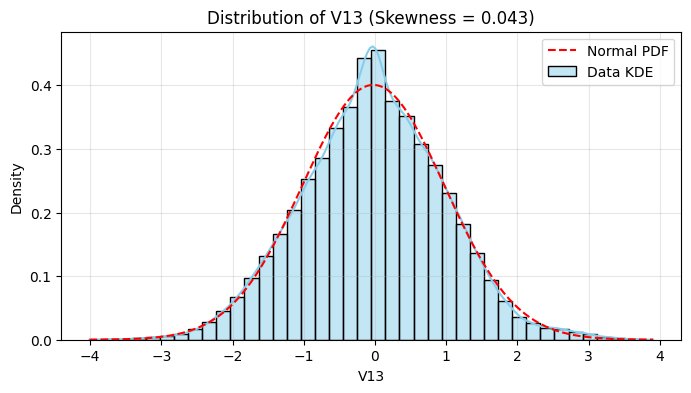

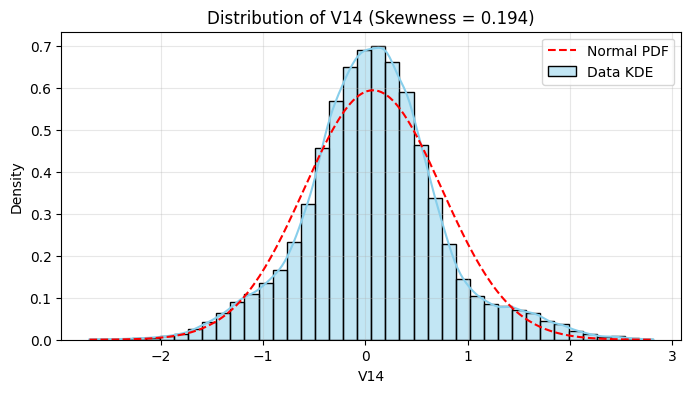

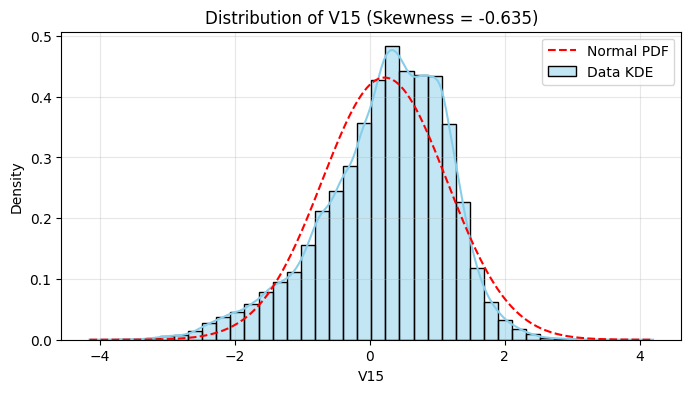

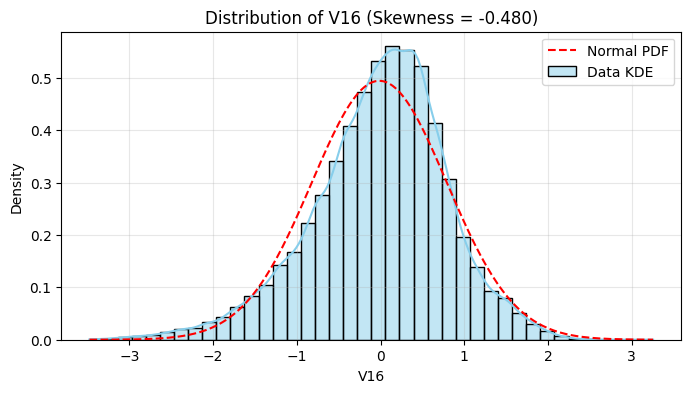

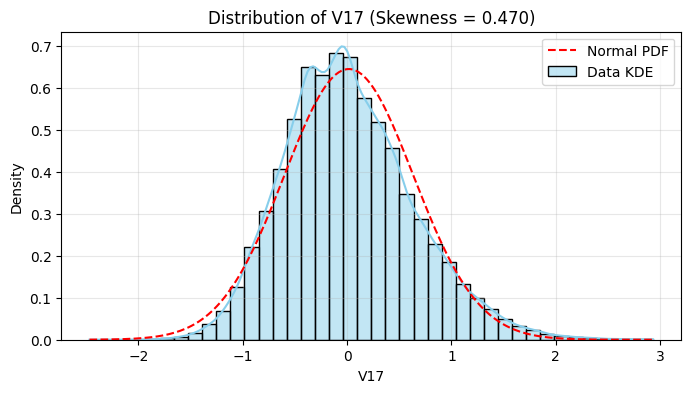

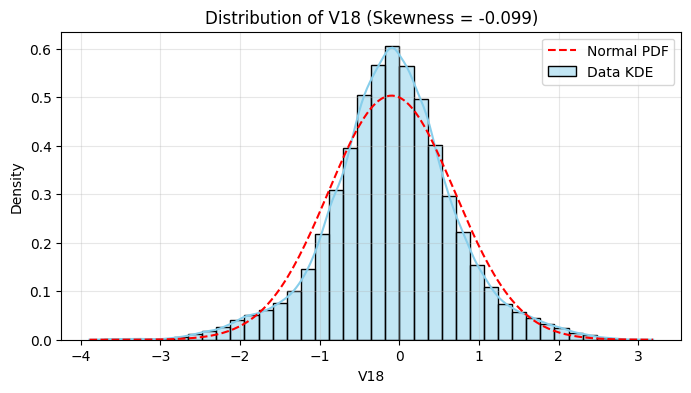

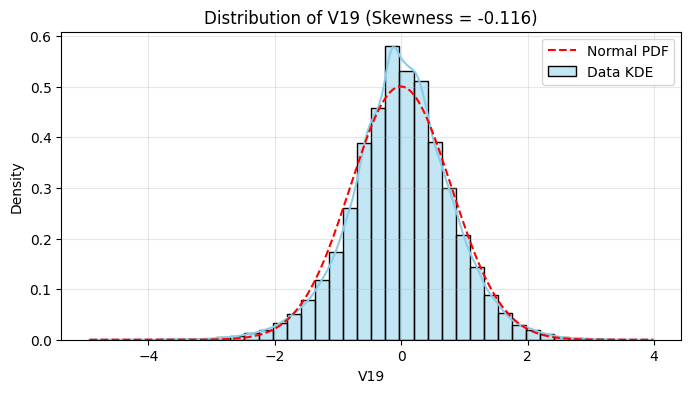

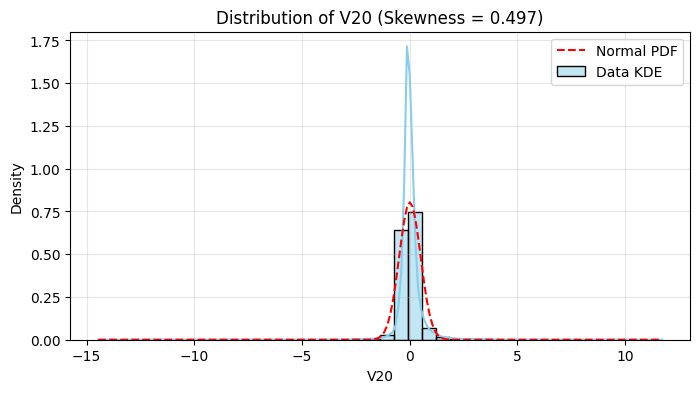

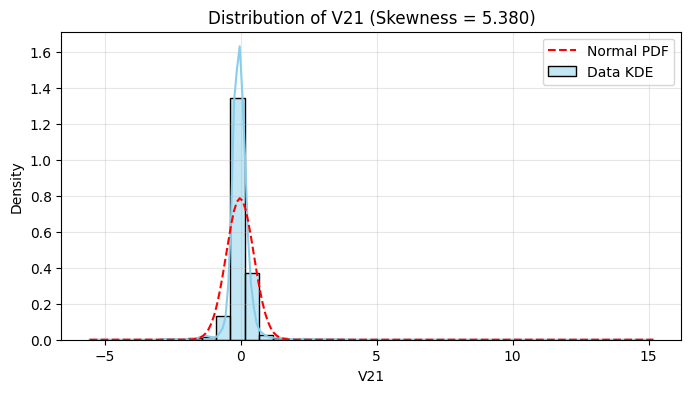

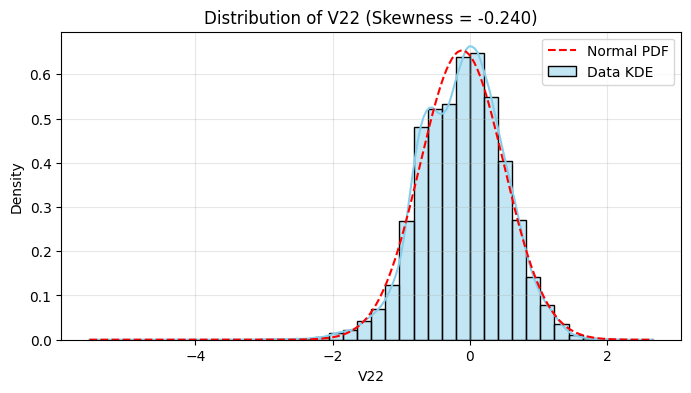

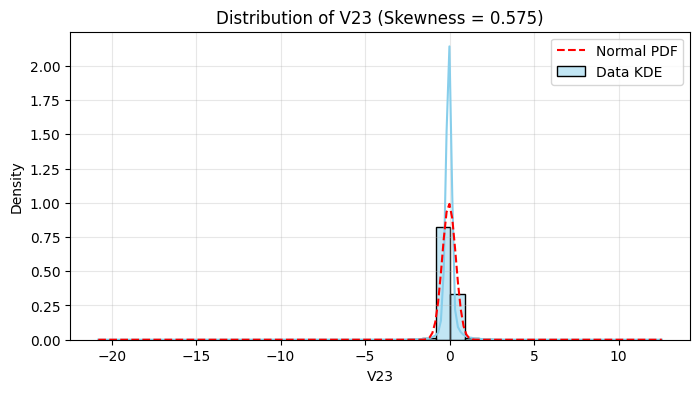

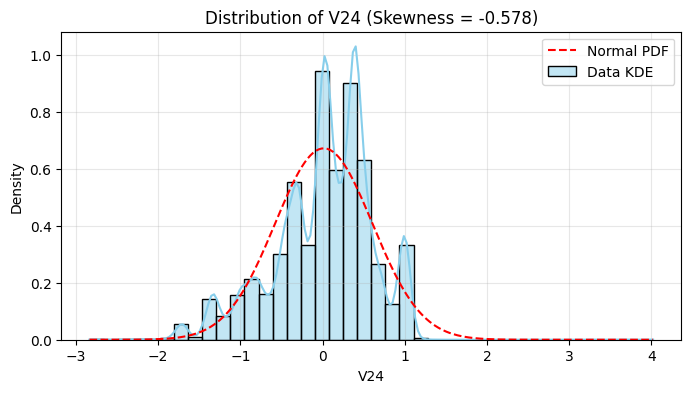

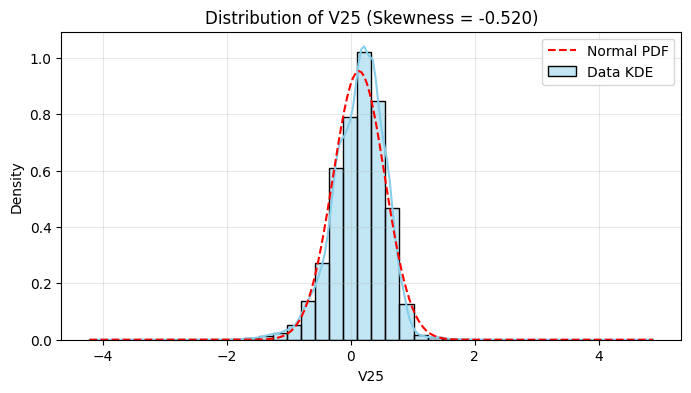

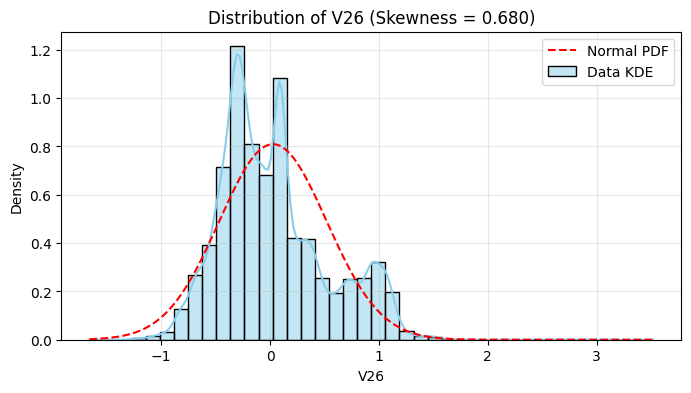

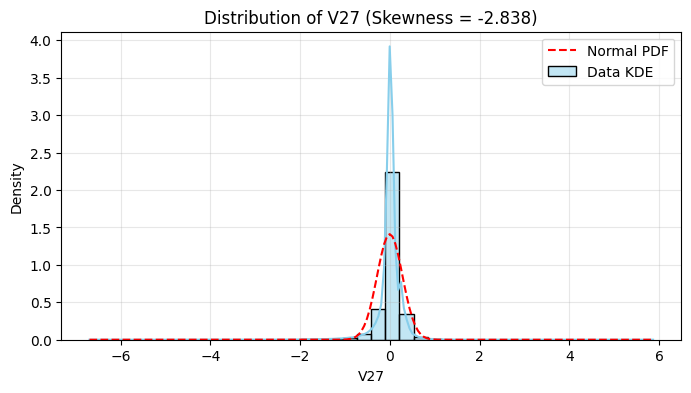

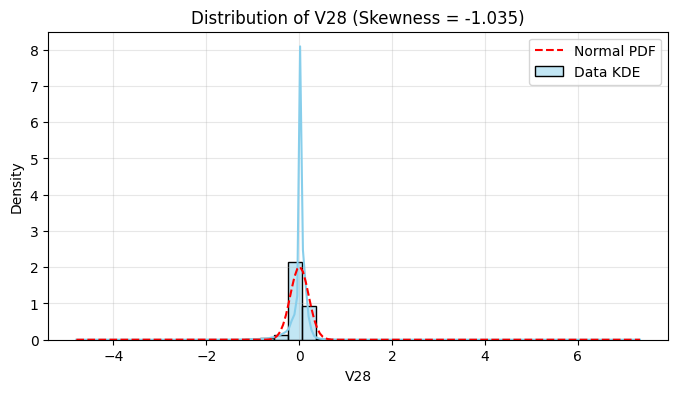

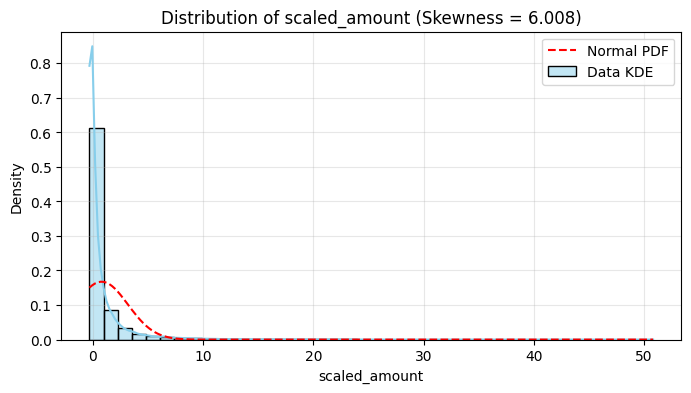

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

def plot_distribution(df, col):
    data = df[col].dropna()
    
    # Tính mean và std để vẽ normal curve
    mu, sigma = data.mean(), data.std()
    
    plt.figure(figsize=(8, 4))
    
    # Histogram + KDE
    sns.histplot(data, kde=True, stat="density", bins=40, color="skyblue", label="Data KDE")
    
    # Vẽ đường phân phối chuẩn
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 200)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label="Normal PDF")
    
    # Ghi skewness
    skew_value = data.skew()
    plt.title(f"Distribution of {col} (Skewness = {skew_value:.3f})")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()
features = [
    'V1','V2','V3','V4','V5','V6','V7','V8','V9','V10',
    'V11','V12','V13','V14','V15','V16','V17','V18','V19','V20',
    'V21','V22','V23','V24','V25','V26','V27','V28',
    'scaled_amount'
]

for col in features:
    plot_distribution(df_train_clean, col)


In [29]:
# In skewness của tất cả features trong một bảng
print(df_train_clean[features].skew().round(4))

V1              -1.3127
V2              -1.8620
V3              -0.2209
V4              -0.0349
V5               0.7123
V6               1.5631
V7              -0.0927
V8              -4.2301
V9               0.2428
V10              0.2333
V11              0.0231
V12             -1.0167
V13              0.0430
V14              0.1937
V15             -0.6355
V16             -0.4803
V17              0.4703
V18             -0.0990
V19             -0.1156
V20              0.4970
V21              5.3804
V22             -0.2403
V23              0.5752
V24             -0.5782
V25             -0.5200
V26              0.6803
V27             -2.8376
V28             -1.0351
scaled_amount    6.0078
dtype: float64


Log-transform các feature có |skew| > 1.5 để ML học dễ hơn

In [30]:

# Các feature cần log-transform (|skew| > 1.5)
log_features = ["V2", "V6", "V8", "V21", "V27", "scaled_amount"]

def signed_log_transform(series):
    return np.sign(series) * np.log1p(np.abs(series))

# Tạo cột mới dạng feature_log
for col in log_features:
    df_train_clean[col + "_log"] = signed_log_transform(df_train_clean[col])

print("Created log-transformed features:")
print([col + "_log" for col in log_features])

Created log-transformed features:
['V2_log', 'V6_log', 'V8_log', 'V21_log', 'V27_log', 'scaled_amount_log']


In [31]:
print(df_train_clean[[col + "_log" for col in log_features]].skew().round(4))


V2_log              -0.3978
V6_log               0.7982
V8_log              -1.0074
V21_log              1.0233
V27_log             -1.2174
scaled_amount_log    1.6265
dtype: float64


In [32]:
#Change the test data using the same transformations as training data

# Define the transformation function
def transform_test_data(df_test):
    # Create a copy of the test data
    df_test_clean = df_test.copy()
    
    # 1. Scaling the 'Amount' column
    rob_scaler = RobustScaler()
    df_test_clean['scaled_amount'] = rob_scaler.fit_transform(df_test_clean['Amount'].values.reshape(-1, 1))
    df_test_clean.drop(['Amount'], axis=1, inplace=True)
    
    # 2. Create 'hour_of_day' feature
    df_test_clean["hour_of_day"] = (df_test_clean["Time"] / 3600) % 24
    
    # 3. Create 'hour_sensitive' feature
    def classify_hour(hour):
        if 5 <= hour <= 20:
            return 1  # Sensitive
        else:
            return 0  # Non-sensitive
    df_test_clean['hour_sensitive'] = df_test_clean['hour_of_day'].apply(classify_hour)
    
    # 4. Create 'hour_sin' and 'hour_cos' features
    df_test_clean["hour_sin"] = np.sin(2 * np.pi * df_test_clean["hour_of_day"] / 24)
    df_test_clean["hour_cos"] = np.cos(2 * np.pi * df_test_clean["hour_of_day"] / 24)
    
    # 5. Create 'amount_q' and 'weird_amount' features
    df_test_clean["amount_q"] = pd.qcut(df_test_clean["scaled_amount"], q=10, duplicates='drop')
    df_test_clean["weird_amount"] = df_test_clean["amount_q"].apply(lambda x: 1 if (x.left <= 0 or x.right >= 7) else 0)
    
    # 6. Remove extreme outliers for specific columns
    cols_to_clean = ["V17", "V16", "V14", "V12", "V10", "V7", "V3"]
    def remove_extreme_outliers(df, cols, multiplier=3.0):
        df_clean = df.copy()
        for col in cols:
            q25 = np.percentile(df_clean[col], 25)
            q75 = np.percentile(df_clean[col], 75)
            iqr = q75 - q25
            lower = q25 - multiplier * iqr
            upper = q75 + multiplier * iqr
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        return df_clean
    df_test_clean = remove_extreme_outliers(df_test_clean, cols_to_clean, multiplier=3.0)
    
    # 7. Create 'risk_score' feature
    df_test_clean["risk_score"] = 0
    df_test_clean["risk_score"] += df_test_clean["weird_amount"]
    df_test_clean["risk_score"] += df_test_clean["hour_sensitive"]
    
    # Tail-based risk
    low_thr_V14 = df_test_clean["V14"].quantile(0.01)
    df_test_clean["risk_score"] += (df_test_clean["V14"] < low_thr_V14).astype(int)
    
    high_thr_V17 = df_test_clean["V17"].quantile(0.99)
    df_test_clean["risk_score"] += (df_test_clean["V17"] > high_thr_V17).astype(int)
    
    high_thr_V7 = df_test_clean["V7"].quantile(0.99)
    df_test_clean["risk_score"] += (df_test_clean["V7"] > high_thr_V7).astype(int)
    
    # 8. Drop unnecessary columns
    cols_to_drop = ["V17_tail", "V16_tail", "V14_tail", "V12_tail", "V10_tail", "V7_tail", "V3_tail"]
    df_test_clean.drop(columns=cols_to_drop, errors='ignore', inplace=True)
    
    # 9. Log-transform specific features
    log_features = ["V2", "V6", "V8", "V21", "V27", "scaled_amount"]
    def signed_log_transform(series):
        return np.sign(series) * np.log1p(np.abs(series))
    for col in log_features:
        df_test_clean[col + "_log"] = signed_log_transform(df_test_clean[col])
    
    return df_test_clean

# Apply the function to df_test
df_test_clean = transform_test_data(df_test)

# Verify the result
print(df_test_clean.head())

           Time        V1        V2        V3        V4        V5        V6  \
142403  84692.0  1.125592 -0.147999  1.151008  1.158851 -0.823914  0.298829   
142404  84693.0 -0.439952  0.683758  1.225814  0.639113  0.716765  0.089295   
142406  84695.0  1.013114 -0.334412  1.305208  0.837406 -1.126833 -0.064321   
142407  84695.0  0.969231 -0.233554  0.238473  0.145793 -0.545741 -0.970680   
142408  84696.0 -0.856523  1.080875  1.866956  1.729941 -0.161741  0.028789   

              V7        V8        V9  ...  hour_cos          amount_q  \
142403 -0.708732  0.294683  0.750838  ...  0.992296     (-0.113, 0.0]   
142404  0.657718  0.034213 -0.472679  ...  0.992305     (-0.113, 0.0]   
142406 -0.594753  0.147737  0.536360  ...  0.992323    (0.522, 1.138]   
142407  0.347393 -0.209522 -0.342571  ...  0.992323    (1.138, 2.617]   
142408  0.401787  0.043774 -0.213916  ...  0.992332  (-0.279, -0.247]   

        weird_amount  risk_score    V2_log    V6_log    V8_log   V21_log  \
142403    

## Logistic regression

In [33]:
df_test_clean.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'hour_of_day', 'hour_sensitive', 'hour_sin',
       'hour_cos', 'amount_q', 'weird_amount', 'risk_score', 'V2_log',
       'V6_log', 'V8_log', 'V21_log', 'V27_log', 'scaled_amount_log'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
final_features = [
    # PCA features (giữ lại)
    'V1','V3','V4','V5','V7','V9','V10','V11','V12','V13','V14',
    'V15','V16','V17','V18','V19','V20','V22','V23','V24','V25','V26','V28',

    # Log-transformed skewed features
    'V2_log','V6_log','V8_log','V21_log','V27_log','scaled_amount_log',

    # Time features
    'hour_sin','hour_cos','hour_sensitive',

    # Domain knowledge
    'risk_score'
]
# =============================
X_train = df_train_clean[final_features]
y_train = df_train_clean["Class"]

X_test = df_test_clean[final_features]
y_test = df_test_clean["Class"]

# =============================
# 3) Scaling
#    (fit trên train, transform trên cả train & test)
# =============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============================
# 4) Train Logistic Regression
# =============================
model = LogisticRegression(
    class_weight='balanced',
    max_iter=500,
    solver='lbfgs'
)

model.fit(X_train_scaled, y_train)

# =============================
# 5) Predict & Evaluate
# =============================
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Training done!")


Training done!



Confusion Matrix (TN, FP, FN, TP):
[[93836 45171]
 [    6    27]]


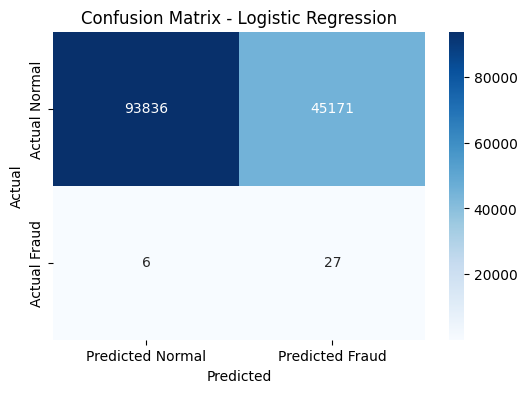


Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.6750    0.8060    139007
           1     0.0006    0.8182    0.0012        33

    accuracy                         0.6751    139040
   macro avg     0.5003    0.7466    0.4036    139040
weighted avg     0.9997    0.6751    0.8058    139040



In [35]:
# 6) Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# =============================
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix (TN, FP, FN, TP):")
print(cm)

# Vẽ heatmap confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Normal", "Predicted Fraud"],
    yticklabels=["Actual Normal", "Actual Fraud"]
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =============================
# 7) Classification Report
# =============================
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

Với mục tiêu:

“Bắt nhầm còn hơn bỏ sót fraud”

Dùng → Top-K Recall để kiểm định mô hình

In [36]:
import numpy as np
import pandas as pd

def top_k_recall(y_true, y_prob, k_list=[0.01, 0.05, 0.10]):
    """
    y_true: ground truth labels (0/1)
    y_prob: predicted probability for class 1
    k_list: list of top-K ratios
    """

    df_eval = pd.DataFrame({
        "y_true": y_true,
        "y_prob": y_prob
    })

    # Sort từ xác suất cao → thấp
    df_eval = df_eval.sort_values("y_prob", ascending=False).reset_index(drop=True)

    total_fraud = df_eval["y_true"].sum()
    results = {}

    for k in k_list:
        top_n = int(len(df_eval) * k)

        # fraud trong top-K%
        fraud_caught = df_eval.iloc[:top_n]["y_true"].sum()

        # Recall @ K%
        recall_k = fraud_caught / total_fraud if total_fraud > 0 else 0

        results[f"Recall@{int(k*100)}%"] = recall_k

    return results


# =============================
# Gọi hàm
# =============================
k_values = [0.01, 0.05, 0.10]   # top 1%, 5%, 10%

results = top_k_recall(y_test, y_prob, k_values)

print("Top-K Fraud Recall:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


Top-K Fraud Recall:
Recall@1%: 0.2424
Recall@5%: 0.4848
Recall@10%: 0.7273


Training done!

Optimal threshold based on PR-curve (Recall ≥ 0.8): 0.7283


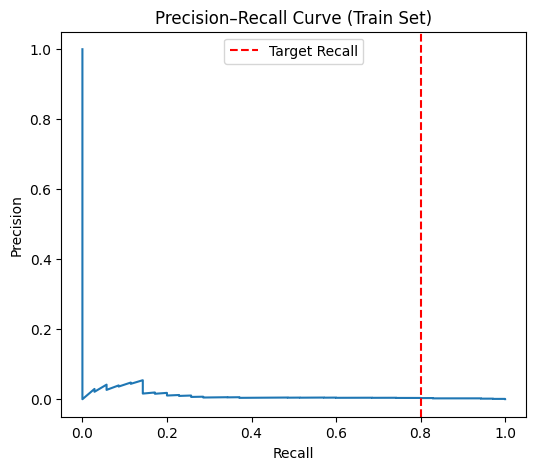


Confusion Matrix (TN, FP, FN, TP):
[[107406  31601]
 [     7     26]]


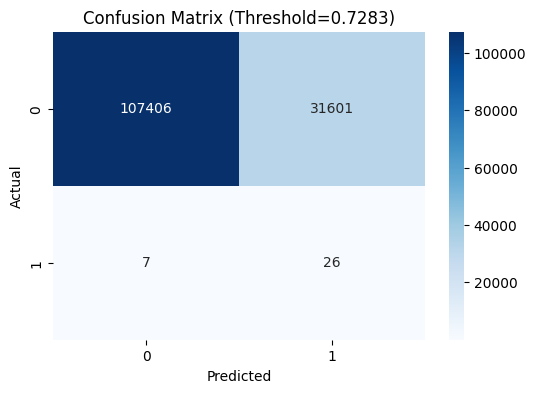


Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.7727    0.8717    139007
           1     0.0008    0.7879    0.0016        33

    accuracy                         0.7727    139040
   macro avg     0.5004    0.7803    0.4367    139040
weighted avg     0.9997    0.7727    0.8715    139040



In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve,
    confusion_matrix, classification_report
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================
# 1) Feature selection
# ===================================================
final_features = [
    'V1','V3','V4','V5','V7','V9','V10','V11','V12','V13','V14',
    'V15','V16','V17','V18','V19','V20','V22','V23','V24','V25','V26','V28',
    'V2_log','V6_log','V8_log','V21_log','V27_log','scaled_amount_log',
    'hour_sin','hour_cos','hour_sensitive',
    'risk_score'
]

# ===================================================
# 2) Train/Test split
# ===================================================
X_train = df_train_clean[final_features]
y_train = df_train_clean["Class"]

X_test  = df_test_clean[final_features]
y_test  = df_test_clean["Class"]

# ===================================================
# 3) Scaling
# ===================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ===================================================
# 4) Train model
# ===================================================
model = LogisticRegression(
    class_weight='balanced',
    max_iter=500,
    solver='lbfgs'
)
model.fit(X_train_scaled, y_train)

print("Training done!")

# ===================================================
# 5) Predict probability
# ===================================================
y_prob_train = model.predict_proba(X_train_scaled)[:, 1]
y_prob_test  = model.predict_proba(X_test_scaled)[:, 1]

# ===================================================
# 6) TÌM THRESHOLD DỰA TRÊN PRECISION–RECALL CURVE (train set)
# ===================================================
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)

# Chọn threshold để đạt recall ≥ 0.80 (ví dụ mục tiêu cao)
target_recall = 0.80

idx = np.where(recall >= target_recall)[0]
if len(idx) > 0:
    best_threshold = thresholds[idx[-1]]  # threshold nhỏ nhất vẫn đạt recall >= mục tiêu
else:
    best_threshold = 0.5  # fallback nếu mô hình quá yếu

print(f"\nOptimal threshold based on PR-curve (Recall ≥ {target_recall}): {best_threshold:.4f}")

# Vẽ Precision–Recall Curve
plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.axvline(target_recall, color='red', linestyle='--', label='Target Recall')
plt.title("Precision–Recall Curve (Train Set)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# ===================================================
# 7) APPLY THRESHOLD MỚI LÊN TEST SET
# ===================================================
y_pred_test = (y_prob_test >= best_threshold).astype(int)

# ===================================================
# 8) Evaluate
# ===================================================
cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (TN, FP, FN, TP):")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Threshold={best_threshold:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))


→ Threshold mới không làm recall cải thiện nhiều,
nhưng đã giảm được số lượng khách hàng bị đánh dấu sai là fraud, nghĩa là giảm "false alarms".

VÀ ĐIỀU NÀY LÀ MỘT KẾT QUẢ TỐT.

Now we use the GMM the create more features to help model learn better

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

# Lấy X_train theo final_features
X_train_gmm = df_train_clean[final_features].copy()
X_test_gmm  = df_test_clean[final_features].copy()

# Scaling cho GMM (bắt buộc)
scaler_gmm = StandardScaler()
X_train_scaled_gmm = scaler_gmm.fit_transform(X_train_gmm)
X_test_scaled_gmm  = scaler_gmm.transform(X_test_gmm)


In [39]:
lowest_bic = np.inf
best_k = None
bic_values = []

K_candidates = range(1,8)   # thử từ 1 → 7 clusters

for k in K_candidates:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X_train_scaled_gmm)
    bic = gmm.bic(X_train_scaled_gmm)
    
    bic_values.append(bic)
    
    if bic < lowest_bic:
        lowest_bic = bic
        best_k = k

print("Số cụm tối ưu theo BIC:", best_k)


Số cụm tối ưu theo BIC: 7


In [40]:
gmm_best = GaussianMixture(
    n_components=best_k,
    covariance_type='full',
    random_state=42
)

gmm_best.fit(X_train_scaled_gmm)


,n_components,7
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [41]:
# Hard labels
df_train_clean["gmm_cluster"] = gmm_best.predict(X_train_scaled_gmm)
df_test_clean["gmm_cluster"]  = gmm_best.predict(X_test_scaled_gmm)

# Soft cluster probabilities
cluster_prob_cols = [f"gmm_prob_{i}" for i in range(best_k)]

df_train_clean[cluster_prob_cols] = gmm_best.predict_proba(X_train_scaled_gmm)
df_test_clean[cluster_prob_cols]  = gmm_best.predict_proba(X_test_scaled_gmm)


In [42]:
cluster_fraud_rate = df_train_clean.groupby("gmm_cluster")["Class"].mean()
cluster_counts = df_train_clean["gmm_cluster"].value_counts()

print("Fraud rate theo từng cluster:")
print(cluster_fraud_rate)

print("\nSố lượng sample theo từng cluster:")
print(cluster_counts)


Fraud rate theo từng cluster:
gmm_cluster
0    0.000488
1    0.000179
2    0.000080
3    0.000170
4    0.000423
5    0.000000
6    0.000318
Name: Class, dtype: float64

Số lượng sample theo từng cluster:
gmm_cluster
6    34612
3    29381
1    22366
4    16550
0    14349
2    12444
5     6822
Name: count, dtype: int64


In [43]:
df_train_clean.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'hour_of_day', 'hour_sensitive', 'hour_sin',
       'hour_cos', 'amount_q', 'weird_amount', 'risk_score', 'V2_log',
       'V6_log', 'V8_log', 'V21_log', 'V27_log', 'scaled_amount_log',
       'gmm_cluster', 'gmm_prob_0', 'gmm_prob_1', 'gmm_prob_2', 'gmm_prob_3',
       'gmm_prob_4', 'gmm_prob_5', 'gmm_prob_6'],
      dtype='object')

Training done!

Optimal threshold based on PR-curve (Recall ≥ 0.8): 0.7290


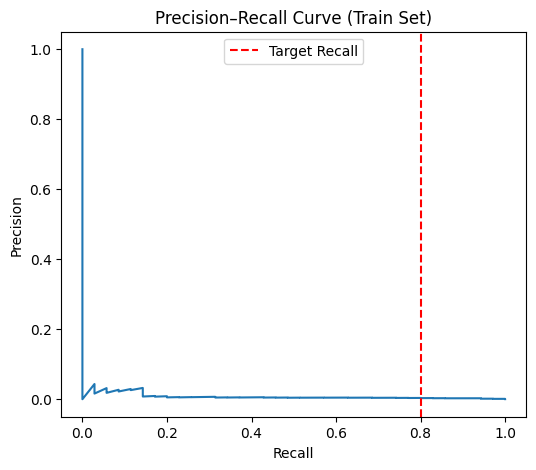


Confusion Matrix (TN, FP, FN, TP):
[[109956  29051]
 [     8     25]]


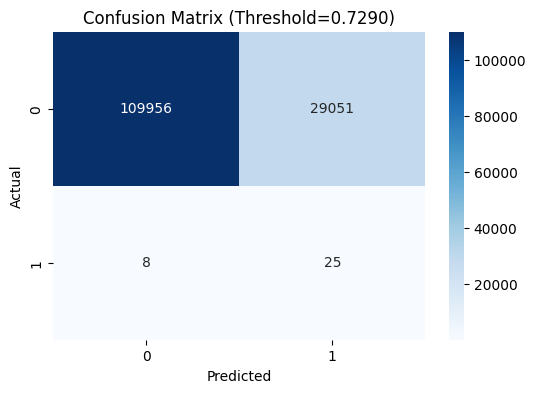


Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.7910    0.8833    139007
           1     0.0009    0.7576    0.0017        33

    accuracy                         0.7910    139040
   macro avg     0.5004    0.7743    0.4425    139040
weighted avg     0.9997    0.7910    0.8831    139040



In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_recall_curve,
    confusion_matrix, classification_report
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================
# 1) Feature selection
# ===================================================
final_features = [
    'V1','V3','V4','V5','V7','V9','V10','V11','V12','V13','V14',
    'V15','V16','V17','V18','V19','V20','V22','V23','V24','V25','V26','V28',
    'V2_log','V6_log','V8_log','V21_log','V27_log','scaled_amount_log',
    'hour_sin','hour_cos','hour_sensitive',
    'risk_score', 'gmm_prob_0', 'gmm_prob_1', 'gmm_prob_2', 'gmm_prob_3',
       'gmm_prob_4', 'gmm_prob_5', 'gmm_prob_6'
]

# ===================================================
# 2) Train/Test split
# ===================================================
X_train = df_train_clean[final_features]
y_train = df_train_clean["Class"]

X_test  = df_test_clean[final_features]
y_test  = df_test_clean["Class"]

# ===================================================
# 3) Scaling
# ===================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# ===================================================
# 4) Train model
# ===================================================
model = LogisticRegression(
    class_weight='balanced',
    max_iter=500,
    solver='lbfgs'
)
model.fit(X_train_scaled, y_train)

print("Training done!")

# ===================================================
# 5) Predict probability
# ===================================================
y_prob_train = model.predict_proba(X_train_scaled)[:, 1]
y_prob_test  = model.predict_proba(X_test_scaled)[:, 1]

# ===================================================
# 6) TÌM THRESHOLD DỰA TRÊN PRECISION–RECALL CURVE (train set)
# ===================================================
precision, recall, thresholds = precision_recall_curve(y_train, y_prob_train)

# Chọn threshold để đạt recall ≥ 0.80 (ví dụ mục tiêu cao)
target_recall = 0.80

idx = np.where(recall >= target_recall)[0]
if len(idx) > 0:
    best_threshold = thresholds[idx[-1]]  # threshold nhỏ nhất vẫn đạt recall >= mục tiêu
else:
    best_threshold = 0.5  # fallback nếu mô hình quá yếu

print(f"\nOptimal threshold based on PR-curve (Recall ≥ {target_recall}): {best_threshold:.4f}")

# Vẽ Precision–Recall Curve
plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.axvline(target_recall, color='red', linestyle='--', label='Target Recall')
plt.title("Precision–Recall Curve (Train Set)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# ===================================================
# 7) APPLY THRESHOLD MỚI LÊN TEST SET
# ===================================================
y_pred_test = (y_prob_test >= best_threshold).astype(int)

# ===================================================
# 8) Evaluate
# ===================================================
cm = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (TN, FP, FN, TP):")
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Threshold={best_threshold:.4f})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))


## XG boost

In [45]:
!pip install xgboost